In [10]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from word2number import w2n

In [ ]:
pip install word2number

In [11]:
chemin_fichier = "../ParisHousing.csv"
data = pd.read_csv(chemin_fichier)
print(data)


#remarque : il n'y a  pas l'arrondissement

      Unnamed: 0  squareMeters numberOfRooms  floors  cityCode  cityPartRange  \
0              0         75523         three      63      9373              3   
1              1         80771   thirty-nine      98     39381              8   
2              2         55712   fifty-eight      19     34457              6   
3              3         32316   forty-seven       6     27939             10   
4              4         70429      nineteen      90     38045              3   
...          ...           ...           ...     ...       ...            ...   
9995        9995          1726   eighty-nine       5     73133              7   
9996        9996         44403   twenty-nine      12     34606              9   
9997        9997         83841         three      69     80933             10   
9998        9998         59036       seventy      96     55856              1   
9999        9999          1440   eighty-four      49     18412              6   

      numPrevOwners  made  

In [12]:
data.count().isna()
#Les colonnes pour lesquelles le résultat est True ont au moins une valeur manquante, 
# tandis que celles pour lesquelles le résultat est False n'ont pas de valeurs manquantes.

Unnamed: 0           False
squareMeters         False
numberOfRooms        False
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
category             False
PoolAndYard          False
dtype: bool

In [32]:
data.dtypes

Unnamed: 0             int64
squareMeters           int64
numberOfRooms         object
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt              bool
hasStormProtector       bool
basement               int64
attic                  int64
garage                 int64
hasStorageRoom          bool
hasGuestRoom           int64
price                float64
category              object
PoolAndYard           object
numberOfRooms_int      int64
dtype: object

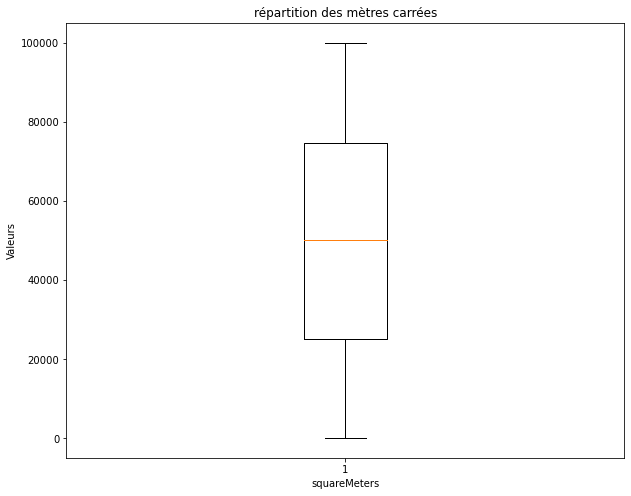

In [14]:
#check des valeurs aberrantes 
#remarque : la base de données contient majoriatirement des immeubles (au vu du metre carré)

plt.figure(figsize=(10, 8))  
plt.boxplot(data['squareMeters'])

plt.title('répartition des mètres carrées')
plt.xlabel('squareMeters')
plt.ylabel('Valeurs')

plt.show()


In [15]:
data['squareMeters'].describe()

count    10000.00000
mean     49870.13120
std      28774.37535
min         89.00000
25%      25098.50000
50%      50105.50000
75%      74609.75000
max      99999.00000
Name: squareMeters, dtype: float64

In [16]:
# on supprime les valeurs abberantes c'est à dire au dessus de 75% et en dessous de 25%. D'après l'analyse d'un
#boxpolt c'est ce qui est pertinent à faire
data = data[(data['squareMeters'] > 25000) & (data['squareMeters']< 75000)]

In [30]:
#On change les chiffres présents pour les nombres écrits en chaine de caractère pour le nombre de chambres en int
data['numberOfRooms_int'] = data['numberOfRooms'].apply(w2n.word_to_num)

In [33]:
data

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard,numberOfRooms_int
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard,58
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard,47
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard,19
5,5,39223,thirty-six,17,39489,8,6,2012,False,True,2009,4552,757,False,1,3926647.2,Basic,has pool and no yard,36
6,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9986,26907,sixty-five,43,3916,8,3,2003,True,False,1276,9010,248,False,4,2701055.3,Luxury,has pool and has yard,65
9987,9987,45452,eleven,15,98506,9,3,1992,True,True,2811,9474,929,False,5,4546984.2,Basic,no pool and no yard,11
9992,9992,33545,fifty-five,79,8288,1,2,2006,True,False,3480,4046,946,True,6,3361070.6,Basic,has pool and no yard,55
9996,9996,44403,twenty-nine,12,34606,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard,29


In [42]:
#on vérifie que tous a bien été converti
data['numberOfRooms_int'].isna().sum()

0

In [43]:
data.dtypes

Unnamed: 0             int64
squareMeters           int64
numberOfRooms         object
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt              bool
hasStormProtector       bool
basement               int64
attic                  int64
garage                 int64
hasStorageRoom          bool
hasGuestRoom           int64
price                float64
category              object
PoolAndYard           object
numberOfRooms_int      int64
dtype: object

In [59]:
#on veut regarder si les codes postaux sont vraiment affiliés à une ville car certains sont introuvables
chemin_fichier2 = "../019HexaSmal.csv"
code_postal = pd.read_csv(chemin_fichier2, encoding='latin-1', sep = ';')
print(code_postal)

      #Code_commune_INSEE        Nom_de_la_commune  Code_postal  \
0                    1001  L ABERGEMENT CLEMENCIAT         1400   
1                    1002    L ABERGEMENT DE VAREY         1640   
2                    1004        AMBERIEU EN BUGEY         1500   
3                    1005      AMBERIEUX EN DOMBES         1330   
4                    1006                  AMBLEON         1300   
...                   ...                      ...          ...   
39188               98831                      VOH        98883   
39189               98832                     YATE        98834   
39190               98833                  KOUAOUA        98818   
39191               98901        ILE DE CLIPPERTON        98799   
39192               99138                   MONACO        98000   

        Libellé_d_acheminement Ligne_5  
0      L ABERGEMENT CLEMENCIAT     NaN  
1        L ABERGEMENT DE VAREY     NaN  
2            AMBERIEU EN BUGEY     NaN  
3          AMBERIEUX EN DOMBES 

In [61]:
code_postal= code_postal.rename(columns={'Code_postal': 'cityCode'})

In [62]:
code_postal

,#Code_commune_INSEE,Nom_de_la_commune,cityCode,Libellé_d_acheminement,Ligne_5
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN
4,1006,AMBLEON,1300,AMBLEON,NaN
...,...,...,...,...,...
39188,98831,VOH,98883,OUACO,VOH
39189,98832,YATE,98834,YATE,NaN
39190,98833,KOUAOUA,98818,KOUAOUA,NaN
39191,98901,ILE DE CLIPPERTON,98799,ILE DE CLIPPERTON,NaN


In [63]:
# Supposons que vous ayez deux DataFrames : table1 et table2

# Jointure des tables en utilisant la colonne 'colonne_commune'
resultat_jointure = pd.merge(data, code_postal, on='cityCode', how='inner')

# Affichage du résultat de la jointure
resultat_jointure


,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,...,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard,numberOfRooms_int,#Code_commune_INSEE,Nom_de_la_commune,Libellé_d_acheminement,Ligne_5
0,6,58682,ten,99,6450,10,9,1995,True,True,...,False,5,5876376.5,Luxury,has pool and has yard,10,6013,BELVEDERE,BELVEDERE,NaN
1,6,58682,ten,99,6450,10,9,1995,True,True,...,False,5,5876376.5,Luxury,has pool and has yard,10,6020,LA BOLLENE VESUBIE,LA BOLLENE VESUBIE,NaN
2,6,58682,ten,99,6450,10,9,1995,True,True,...,False,5,5876376.5,Luxury,has pool and has yard,10,6074,LANTOSQUE,LANTOSQUE,NaN
3,6,58682,ten,99,6450,10,9,1995,True,True,...,False,5,5876376.5,Luxury,has pool and has yard,10,6103,ROQUEBILLIERE,ROQUEBILLIERE,NaN
4,6,58682,ten,99,6450,10,9,1995,True,True,...,False,5,5876376.5,Luxury,has pool and has yard,10,6127,ST MARTIN VESUBIE,ST MARTIN VESUBIE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,9926,64937,fifty,66,9300,10,3,2006,True,False,...,False,2,6498696.6,Basic,no pool and has yard,50,9249,ROQUEFIXADE,ROQUEFIXADE,NaN
1864,9926,64937,fifty,66,9300,10,3,2006,True,False,...,False,2,6498696.6,Basic,no pool and has yard,50,9250,ROQUEFORT LES CASCADES,ROQUEFORT LES CASCADES,NaN
1865,9926,64937,fifty,66,9300,10,3,2006,True,False,...,False,2,6498696.6,Basic,no pool and has yard,50,9262,ST JEAN D AIGUES VIVES,ST JEAN D AIGUES VIVES,NaN
1866,9926,64937,fifty,66,9300,10,3,2006,True,False,...,False,2,6498696.6,Basic,no pool and has yard,50,9281,SAUTEL,SAUTEL,NaN


In [64]:
resultat_jointure = resultat_jointure.drop(columns=['#Code_commune_INSEE', 'Libellé_d_acheminement', 'Ligne_5'])

In [69]:
#on observe la réduction de nombre de ligne après la jointure
data = resultat_jointure 
data

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard,numberOfRooms_int,Nom_de_la_commune
0,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,BELVEDERE
1,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,LA BOLLENE VESUBIE
2,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,LANTOSQUE
3,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,ROQUEBILLIERE
4,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,ST MARTIN VESUBIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,9926,64937,fifty,66,9300,10,3,2006,True,False,8652,6351,716,False,2,6498696.6,Basic,no pool and has yard,50,ROQUEFIXADE
1864,9926,64937,fifty,66,9300,10,3,2006,True,False,8652,6351,716,False,2,6498696.6,Basic,no pool and has yard,50,ROQUEFORT LES CASCADES
1865,9926,64937,fifty,66,9300,10,3,2006,True,False,8652,6351,716,False,2,6498696.6,Basic,no pool and has yard,50,ST JEAN D AIGUES VIVES
1866,9926,64937,fifty,66,9300,10,3,2006,True,False,8652,6351,716,False,2,6498696.6,Basic,no pool and has yard,50,SAUTEL


In [70]:
data['basement'].describe()


count    1868.000000
mean     5641.167024
std      2838.598715
min        10.000000
25%      3147.000000
50%      6036.000000
75%      8158.000000
max      9961.000000
Name: basement, dtype: float64

In [73]:
data = data[(data['basement'] > 3150) & (data['basement']< 8160)]
data

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard,numberOfRooms_int,Nom_de_la_commune
0,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,BELVEDERE
1,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,LA BOLLENE VESUBIE
2,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,LANTOSQUE
3,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,ROQUEBILLIERE
4,6,58682,ten,99,6450,10,9,1995,True,True,5930,9453,848,False,5,5876376.5,Luxury,has pool and has yard,10,ST MARTIN VESUBIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,9775,35962,thirty-five,41,26170,1,10,1996,True,False,6537,9324,933,False,0,3601900.6,Basic,has pool and no yard,35,LA ROCHE SUR LE BUIS
1835,9775,35962,thirty-five,41,26170,1,10,1996,True,False,6537,9324,933,False,0,3601900.6,Basic,has pool and no yard,35,LA ROCHETTE DU BUIS
1836,9775,35962,thirty-five,41,26170,1,10,1996,True,False,6537,9324,933,False,0,3601900.6,Basic,has pool and no yard,35,ST AUBAN SUR L OUVEZE
1837,9775,35962,thirty-five,41,26170,1,10,1996,True,False,6537,9324,933,False,0,3601900.6,Basic,has pool and no yard,35,STE EUPHEMIE SUR OUVEZE


In [75]:
data.describe()

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,numberOfRooms_int
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02,944.000000
mean,4979.194915,48949.300847,53.241525,46255.974576,5.774364,5.966102,2004.809322,5906.711864,5449.055085,535.965042,4.376059,4.901370e+06,43.799788
std,2809.411634,13652.206914,26.976226,27274.961843,2.827103,2.703228,9.441435,1428.350139,2898.918035,252.370198,3.294248,1.365291e+06,30.084102
min,6.000000,25493.000000,1.000000,2230.000000,1.000000,1.000000,1990.000000,3183.000000,7.000000,102.000000,0.000000,2.555725e+06,1.000000
25%,2323.000000,37174.000000,30.000000,21340.000000,3.000000,4.000000,1997.000000,4749.000000,3113.000000,332.000000,1.000000,3.721209e+06,17.000000
50%,4852.500000,45625.000000,57.500000,44635.000000,6.000000,6.000000,2003.000000,6051.000000,5411.500000,522.000000,4.000000,4.567225e+06,38.500000
75%,7253.000000,59751.000000,78.000000,72350.000000,8.000000,8.000000,2013.000000,7138.000000,8312.000000,742.000000,7.000000,5.988689e+06,67.250000
max,9775.000000,74988.000000,99.000000,98833.000000,10.000000,10.000000,2021.000000,8158.000000,9969.000000,998.000000,10.000000,7.513503e+06,100.000000


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

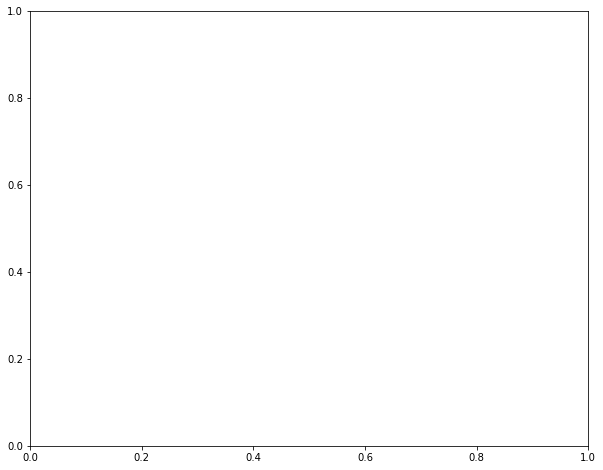

In [76]:
plt.figure(figsize=(10, 8))  
plt.boxplot(data)

plt.title('répartition des mètres carrées')
plt.xlabel('squareMeters')
plt.ylabel('Valeurs')

plt.show()